<a href="https://colab.research.google.com/github/prathamshankwalker/Cepheus_Data_Science_Hackathon/blob/main/cepheus_ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing dataprep for EDA and Data visualization

In [2]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.

Importing all necessary libraries


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from dataprep.eda import create_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',None) #display all the columns of DataFrame

# Downloading and getting the data


In [9]:
# converting csv data into a pandas dataframe
train_df=pd.read_csv("train_data.csv")


In [10]:
# Having a look at the first 10 rows of train_df
train_df.head(10)

,Unnamed: 0,Sample Name,Sample ID,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4,Bacteria
0,0,Cepheus_01010101,1010101,1.010,0.2030,0.15400,1.6850,1.57,19.10,5.23,12.060,19.5,2.390,0.668,17.300,1.64,2.060,4.930,18.30,3.61,18.80,18.80,18.80,18.700,Raizovox
1,1,Cepheus_01010102,1010102,0.209,0.1270,0.02860,1.2450,11.70,10.90,15.70,7.400,21.8,0.537,0.554,10.500,15.30,0.633,1.210,10.70,15.90,10.60,10.60,10.70,10.500,Raizovox
2,2,Cepheus_01010103,1010103,0.178,0.0261,0.01370,0.5850,5.45,2.19,7.66,3.400,22.8,0.336,0.394,1.780,18.90,0.561,0.671,1.79,19.10,1.87,1.87,1.78,1.780,Raizovox
3,3,Cepheus_01010104,1010104,0.100,0.0108,0.00416,0.3715,4.82,8.37,10.80,0.632,15.7,0.262,0.136,8.050,10.10,0.403,0.441,8.03,10.20,7.98,7.98,8.10,8.100,Flitter
4,4,Cepheus_01010105,1010105,3.760,1.4100,1.41000,4.4200,1.95,10.80,3.79,10.780,12.2,10.600,1.570,2.130,13.50,16.400,3.400,9.78,14.90,2.13,2.13,2.13,2.130,Elixoria
5,5,Cepheus_01010106,1010106,0.573,0.1130,0.04760,1.2450,6.73,17.90,9.41,3.860,11.2,0.854,0.513,17.100,6.33,1.650,0.806,17.80,6.50,17.00,17.00,17.10,17.100,Elixoria
6,6,Cepheus_01010107,1010107,0.478,0.4550,0.11000,2.1600,8.50,15.50,12.00,10.100,22.8,0.943,1.330,14.900,11.00,1.410,2.240,15.40,11.90,14.80,14.80,14.90,14.900,Charmayanne
7,7,Cepheus_01010108,1010108,0.927,0.2170,0.10500,1.7100,4.67,1.15,7.91,12.320,21.7,0.966,1.060,0.653,7.22,1.440,2.510,1.19,8.44,1.15,1.15,1.15,0.653,Myaree
8,8,Cepheus_01010109,1010109,0.739,0.4210,0.16100,2.1450,5.68,7.48,8.11,9.600,15.5,1.270,1.290,5.850,5.94,2.230,2.090,6.96,6.87,6.80,6.80,5.85,5.850,Myaree
9,9,Cepheus_01010110,1010110,0.204,0.0329,0.01620,0.6350,2.18,11.10,7.53,2.300,18.8,0.779,0.167,10.500,18.80,0.791,1.380,10.60,19.30,10.80,10.80,10.70,10.500,Elixoria


# Exploratory Data Analysis(EDA)
- Using the the dataprep library for data visualizatoin and exploration
- create_report method creates an overall report of the data 

DataPrep Report
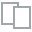
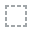
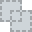
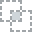
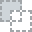
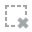
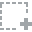
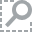
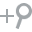
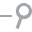
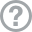
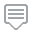
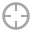
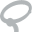
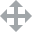
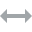
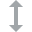
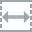
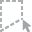
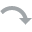
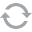
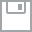
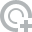
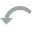
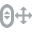
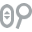
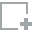
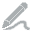
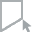
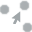
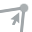
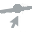

In [14]:
# using the create_report method for data visualization and data exploration
create_report(train_df)

## observations
- There are no missing values in the following data
- There are no duplicate rows in the data
- There are 23 Numerical and 2 categorical variables
- Most of the variables have a positive correlation with each other, except for a few who have a small value of negative correlation.

# Data Cleaning
- Lets remove the some columns that are potentially unuseful.
- In this case, the columns 'Unnamed: 0' and Sample_name' wont have any significance for training.

In [15]:
new_train_df=train_df.drop(['Sample Name','Unnamed: 0'],axis=1)

In [16]:
# looking at the first 10 rows of new dataframe
new_train_df.head(10)

,Sample ID,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4,Bacteria
0,1010101,1.010,0.2030,0.15400,1.6850,1.57,19.10,5.23,12.060,19.5,2.390,0.668,17.300,1.64,2.060,4.930,18.30,3.61,18.80,18.80,18.80,18.700,Raizovox
1,1010102,0.209,0.1270,0.02860,1.2450,11.70,10.90,15.70,7.400,21.8,0.537,0.554,10.500,15.30,0.633,1.210,10.70,15.90,10.60,10.60,10.70,10.500,Raizovox
2,1010103,0.178,0.0261,0.01370,0.5850,5.45,2.19,7.66,3.400,22.8,0.336,0.394,1.780,18.90,0.561,0.671,1.79,19.10,1.87,1.87,1.78,1.780,Raizovox
3,1010104,0.100,0.0108,0.00416,0.3715,4.82,8.37,10.80,0.632,15.7,0.262,0.136,8.050,10.10,0.403,0.441,8.03,10.20,7.98,7.98,8.10,8.100,Flitter
4,1010105,3.760,1.4100,1.41000,4.4200,1.95,10.80,3.79,10.780,12.2,10.600,1.570,2.130,13.50,16.400,3.400,9.78,14.90,2.13,2.13,2.13,2.130,Elixoria
5,1010106,0.573,0.1130,0.04760,1.2450,6.73,17.90,9.41,3.860,11.2,0.854,0.513,17.100,6.33,1.650,0.806,17.80,6.50,17.00,17.00,17.10,17.100,Elixoria
6,1010107,0.478,0.4550,0.11000,2.1600,8.50,15.50,12.00,10.100,22.8,0.943,1.330,14.900,11.00,1.410,2.240,15.40,11.90,14.80,14.80,14.90,14.900,Charmayanne
7,1010108,0.927,0.2170,0.10500,1.7100,4.67,1.15,7.91,12.320,21.7,0.966,1.060,0.653,7.22,1.440,2.510,1.19,8.44,1.15,1.15,1.15,0.653,Myaree
8,1010109,0.739,0.4210,0.16100,2.1450,5.68,7.48,8.11,9.600,15.5,1.270,1.290,5.850,5.94,2.230,2.090,6.96,6.87,6.80,6.80,5.85,5.850,Myaree
9,1010110,0.204,0.0329,0.01620,0.6350,2.18,11.10,7.53,2.300,18.8,0.779,0.167,10.500,18.80,0.791,1.380,10.60,19.30,10.80,10.80,10.70,10.500,Elixoria


Lets find out all the classes of Bacterias

In [18]:
class_names=new_train_df['Bacteria'].unique()
class_names

array(['Raizovox', 'Flitter', 'Elixoria', 'Charmayanne', 'Myaree',
       'Gelledius', 'Cruor', 'Onyxium', 'Potentiopus'], dtype=object)

In [19]:
len(class_names)

9

There are total 9 classes of bacterias namely: Raizovox, Flitter, Elixoria, Charmayanne , Myaree , Gelledius, Cruor, Onyxium, Potentiopus

In [20]:
number_of_classes=9

Converting the categorical variable of Bacteria into numerical for model training

In [ ]:
y= new_train_df['Bacteria']
# converting dataframe into a numpy array
y=np.array(y)
y

array(['Raizovox', 'Raizovox', 'Raizovox', ..., 'Cruor', 'Elixoria',
       'Raizovox'], dtype=object)

Lets Create a new column 'label' which will have a numerical value for all the corresponding bacteria classes
 

In [29]:
new_train_df['label']=pd.Categorical(new_train_df["Bacteria"]).codes

Lets visualize the mapping of Bacteria with label

In [30]:
for i in range(9):
  print(f"{pd.Categorical(new_train_df['Bacteria']).categories[i]} => {i}")

Charmayanne => 0
Cruor => 1
Elixoria => 2
Flitter => 3
Gelledius => 4
Myaree => 5
Onyxium => 6
Potentiopus => 7
Raizovox => 8


Let's view the first 10 rows of the new dataframe


In [31]:
new_train_df.head(10)

,Sample ID,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4,Bacteria,label
0,1010101,1.010,0.2030,0.15400,1.6850,1.57,19.10,5.23,12.060,19.5,2.390,0.668,17.300,1.64,2.060,4.930,18.30,3.61,18.80,18.80,18.80,18.700,Raizovox,8
1,1010102,0.209,0.1270,0.02860,1.2450,11.70,10.90,15.70,7.400,21.8,0.537,0.554,10.500,15.30,0.633,1.210,10.70,15.90,10.60,10.60,10.70,10.500,Raizovox,8
2,1010103,0.178,0.0261,0.01370,0.5850,5.45,2.19,7.66,3.400,22.8,0.336,0.394,1.780,18.90,0.561,0.671,1.79,19.10,1.87,1.87,1.78,1.780,Raizovox,8
3,1010104,0.100,0.0108,0.00416,0.3715,4.82,8.37,10.80,0.632,15.7,0.262,0.136,8.050,10.10,0.403,0.441,8.03,10.20,7.98,7.98,8.10,8.100,Flitter,3
4,1010105,3.760,1.4100,1.41000,4.4200,1.95,10.80,3.79,10.780,12.2,10.600,1.570,2.130,13.50,16.400,3.400,9.78,14.90,2.13,2.13,2.13,2.130,Elixoria,2
5,1010106,0.573,0.1130,0.04760,1.2450,6.73,17.90,9.41,3.860,11.2,0.854,0.513,17.100,6.33,1.650,0.806,17.80,6.50,17.00,17.00,17.10,17.100,Elixoria,2
6,1010107,0.478,0.4550,0.11000,2.1600,8.50,15.50,12.00,10.100,22.8,0.943,1.330,14.900,11.00,1.410,2.240,15.40,11.90,14.80,14.80,14.90,14.900,Charmayanne,0
7,1010108,0.927,0.2170,0.10500,1.7100,4.67,1.15,7.91,12.320,21.7,0.966,1.060,0.653,7.22,1.440,2.510,1.19,8.44,1.15,1.15,1.15,0.653,Myaree,5
8,1010109,0.739,0.4210,0.16100,2.1450,5.68,7.48,8.11,9.600,15.5,1.270,1.290,5.850,5.94,2.230,2.090,6.96,6.87,6.80,6.80,5.85,5.850,Myaree,5
9,1010110,0.204,0.0329,0.01620,0.6350,2.18,11.10,7.53,2.300,18.8,0.779,0.167,10.500,18.80,0.791,1.380,10.60,19.30,10.80,10.80,10.70,10.500,Elixoria,2


# Feature Engineering
- After lot of research , I found that :
1. Bordered Area 
- the sum of bordered areas in bacteria can play a significant role in determining the bacterium's phenotype, pathogenesis, antibiotic resistance, and evolution. 
- This concludes that we can use the sum of bordered areas to determine various characteristics of Bacterias which will inturn help us classify them into different types.

2. Convex Hull
- The convex hull of a bacterial colony is the smallest convex polygon that completely encloses all the points on the outer edge of the colony. 
- This can be used to measure the size and shape of the colony, which can provide information about the growth and behavior of the bacteria. 
- Convex hulls are often used in microbiology research to analyze the morphology and growth of bacterial colonies.
- Looking at the data of all 4 convex hull values, it will be significant to take the average into a new column, since the values have less variance



## Preparing Data for training
1. X - for the features
2. y - for the label

In [32]:
# creating X without labels : Droping Bacteria and label
X=new_train_df.drop(['Bacteria',"label"],axis=1)

Applying feature engineering to create two new columns : sum_bordered_area and avg_convex_hull

In [33]:

X['sum_bordered_area']=X['Bordered Area 1']+X['Bordered Area 2']+X['Bordered Area 3']+X['Bordered Area 4']
X['avg_convex_hull']=(X['Convex Hull 1']+X['Convex Hull 2']+X['Convex Hull 3']+X['Convex Hull 4'])/4.0


Removing all the unwanted columns from X


In [34]:
X_final=X.drop(['Sample ID','Bordered Area 1','Bordered Area 2','Bordered Area 3','Bordered Area 4','Convex Hull 1','Convex Hull 2','Convex Hull 3','Convex Hull 4'],axis=1)

In [35]:
# visualizing the first 10 rows of final X dataframe
X_final.head(10)

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Centroid 1,Centroid 2,sum_bordered_area,avg_convex_hull
0,1.010,0.2030,0.15400,1.6850,1.57,19.10,5.23,12.060,19.5,2.390,0.668,18.30,3.61,25.930,18.77500
1,0.209,0.1270,0.02860,1.2450,11.70,10.90,15.70,7.400,21.8,0.537,0.554,10.70,15.90,27.643,10.60000
2,0.178,0.0261,0.01370,0.5850,5.45,2.19,7.66,3.400,22.8,0.336,0.394,1.79,19.10,21.912,1.82500
3,0.100,0.0108,0.00416,0.3715,4.82,8.37,10.80,0.632,15.7,0.262,0.136,8.03,10.20,18.994,8.04000
4,3.760,1.4100,1.41000,4.4200,1.95,10.80,3.79,10.780,12.2,10.600,1.570,9.78,14.90,35.430,2.13000
5,0.573,0.1130,0.04760,1.2450,6.73,17.90,9.41,3.860,11.2,0.854,0.513,17.80,6.50,25.886,17.05000
6,0.478,0.4550,0.11000,2.1600,8.50,15.50,12.00,10.100,22.8,0.943,1.330,15.40,11.90,29.550,14.85000
7,0.927,0.2170,0.10500,1.7100,4.67,1.15,7.91,12.320,21.7,0.966,1.060,1.19,8.44,11.823,1.02575
8,0.739,0.4210,0.16100,2.1450,5.68,7.48,8.11,9.600,15.5,1.270,1.290,6.96,6.87,16.110,6.32500
9,0.204,0.0329,0.01620,0.6350,2.18,11.10,7.53,2.300,18.8,0.779,0.167,10.60,19.30,31.471,10.70000


In [36]:
# Creating dataframe for labels
y=new_train_df['label']



Splitting X and y into training and Testing Data


In [37]:
#random state to be used is 42, test size is 20%
x_train,x_test,y_train,y_test=train_test_split(X_final,y,random_state=42,test_size=0.2)

Creating and Fitting the model
- Using the RandomForestClassifier from scikit learn
- Doesn't require data normalization / standardization

In [48]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Lets make some predictions on the test data and get the accuracy score


In [49]:
pred_y = model.predict(x_test)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_test, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.6395327942497754


Observation: Accuracy increases as you increase n_estimators


In [50]:
pred_y

array([2, 4, 0, ..., 7, 4, 1], dtype=int8)

### Training the model on the Whole training dataset , ie X_final and y

In [51]:
final_model=RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_final, y)

RandomForestClassifier(random_state=42)

## Predicting on the Test Dataset for submissions

In [52]:
#get the downloaded dataset
test_df=pd.read_csv("test_data.csv")

In [53]:
test_df

,Unnamed: 0,Sample Name,Sample ID,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4
0,0,Cepheus_01099141,1099141,0.163000,0.024300,0.010500,0.525000,3.710000,22.100000,8.150000,1.444000,17.700000,0.487000,0.206000,21.900000,6.620000,0.619000,0.729000,21.900000,6.830000,22.100000,22.100000,21.900000,21.900000
1,1,Cepheus_01099142,1099142,0.294000,0.259000,0.057500,1.755000,7.700000,19.400000,15.400000,6.800000,6.730000,0.991000,0.566000,19.300000,13.300000,1.420000,1.630000,19.900000,13.900000,19.300000,19.300000,19.400000,19.400000
2,2,Cepheus_01099143,1099143,0.818000,0.462000,0.192000,2.250000,3.890000,16.200000,7.420000,16.660000,16.100000,1.480000,1.370000,15.300000,5.110000,2.500000,2.970000,16.000000,5.950000,15.600000,15.600000,15.700000,15.400000
3,3,Cepheus_01099144,1099144,0.579000,0.181000,0.084500,1.610000,4.930000,12.200000,8.760000,11.640000,1.580000,1.520000,0.758000,12.200000,12.200000,0.906000,3.340000,12.400000,13.400000,12.200000,12.200000,12.300000,12.200000
4,4,Cepheus_01099145,1099145,1.950000,0.405000,0.251000,2.280000,3.590000,5.350000,5.820000,14.100000,17.700000,1.660000,1.520000,3.710000,9.920000,2.490000,3.340000,4.730000,11.500000,4.390000,4.390000,3.830000,3.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22259,24110,Cepheus_01123251,1123251,8.127362,15.157922,19.123231,9.070423,22.094411,5.455689,12.540516,10.529871,19.500015,20.486689,3.667026,19.220042,16.174654,8.955012,22.382569,4.508079,8.972265,21.632945,22.181519,8.342526,14.606060
22260,24111,Cepheus_01123252,1123252,7.164784,15.622171,21.345612,5.548892,20.653766,7.100063,11.365499,14.065895,22.241833,13.629324,8.210294,5.198843,11.505571,14.005182,17.756877,3.666004,3.178938,11.753264,5.496658,11.807913,5.444199
22261,24112,Cepheus_01123253,1123253,1.541756,10.593116,20.681600,0.574818,12.162366,3.039919,22.258412,8.876414,4.874545,12.551204,14.457026,11.439650,8.893547,0.693320,14.650210,21.002654,5.473467,17.436773,0.897294,20.407052,4.747563
22262,24113,Cepheus_01123254,1123254,4.449560,7.381957,3.970820,2.375079,19.212798,12.807824,16.877100,12.172326,3.683321,20.677327,8.121279,13.687905,15.446464,14.679119,12.025901,10.546922,15.650620,16.024275,17.161560,7.336912,7.397607


### Getting the Test Data ready for predictions 
- get the test data in the same form of X . ie remove unwanted columns and apply feature engineering.

In [55]:
# making a copy of test_df
t=test_df

In [56]:
#applying same operations as on X

t=t.drop(['Unnamed: 0','Sample Name'],axis=1)

t['sum_bordered_area']=t['Bordered Area 1']+t['Bordered Area 2']+t['Bordered Area 3']+t['Bordered Area 4']

t['avg_convex_hull']=(t['Convex Hull 1']+t['Convex Hull 2']+t['Convex Hull 3']+t['Convex Hull 4'])/4.0

t=t.drop(['Sample ID','Bordered Area 1','Bordered Area 2','Bordered Area 3','Bordered Area 4','Convex Hull 1','Convex Hull 2','Convex Hull 3','Convex Hull 4'],axis=1)

In [57]:
# visualizing first 10 rows of t
t.head(10)

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Centroid 1,Centroid 2,sum_bordered_area,avg_convex_hull
0,0.163000,0.024300,0.010500,0.525000,3.71000,22.100000,8.150000,1.444000,17.700000,0.487000,0.206000,21.900000,6.830000,29.86800,22.000000
1,0.294000,0.259000,0.057500,1.755000,7.70000,19.400000,15.400000,6.800000,6.730000,0.991000,0.566000,19.900000,13.900000,35.65000,19.350000
2,0.818000,0.462000,0.192000,2.250000,3.89000,16.200000,7.420000,16.660000,16.100000,1.480000,1.370000,16.000000,5.950000,25.88000,15.575000
3,0.579000,0.181000,0.084500,1.610000,4.93000,12.200000,8.760000,11.640000,1.580000,1.520000,0.758000,12.400000,13.400000,28.64600,12.225000
4,1.950000,0.405000,0.251000,2.280000,3.59000,5.350000,5.820000,14.100000,17.700000,1.660000,1.520000,4.730000,11.500000,19.46000,4.080000
5,1.610000,0.546000,0.309000,2.420000,3.12000,3.500000,5.300000,14.100000,3.990000,1.910000,1.490000,4.120000,15.600000,23.40000,3.412500
6,2.075441,0.932645,0.456812,3.299634,3.60985,12.634709,6.673321,11.188481,14.652345,2.509118,1.519118,11.189118,3.464165,20.13591,9.738598
7,0.624000,0.425000,0.132000,2.075000,5.24000,0.690000,9.270000,5.560000,10.100000,2.190000,0.596000,1.940000,22.000000,26.63500,0.498000
8,0.251000,0.218000,0.050300,1.695000,12.00000,20.000000,16.400000,0.632000,1.980000,0.661000,0.751000,20.100000,10.500000,32.15700,19.975000
9,0.185000,0.046100,0.016900,0.785000,5.63000,2.460000,10.900000,3.520000,15.400000,0.511000,0.329000,2.010000,15.700000,19.11100,1.950000


### Predicting on the Test data

In [58]:
preds=model.predict(t)

In [59]:
preds

array([3, 8, 1, ..., 2, 1, 6], dtype=int8)

# Making the submission file ready
- The submission file has two columns ID and Bacteria
- We have predictions in numerical form , hence we need to map it into categorical format eg: (Raizovax, flitter...etc)


In [60]:
# creating an empty list for categorical predictions
pred_labels=[]

In [65]:
# creating y as an object of categorical type on train_df (just for simplicity)
y=pd.Categorical(new_train_df['Bacteria'])

In [66]:
# appending all the categorical mappings into pred_labels
for i in preds:
  pred_labels.append(y.categories[i])

we have converted our predictions into categorical form, lets visualize it

In [72]:
for i in range(10):
  print(f"{preds[i]} => {pred_labels[i]}")

3 => Flitter
8 => Raizovox
1 => Cruor
7 => Potentiopus
6 => Onyxium
6 => Onyxium
6 => Onyxium
8 => Raizovox
3 => Flitter
1 => Cruor


Converting pred_labels into a DataFrame with column name as Bacteria

In [73]:
pred_df=pd.DataFrame(pred_labels,columns=['Bacteria'])

In [75]:
# visualize the DataFrame
pred_df.head(10)

,Bacteria
0,Flitter
1,Raizovox
2,Cruor
3,Potentiopus
4,Onyxium
5,Onyxium
6,Onyxium
7,Raizovox
8,Flitter
9,Cruor


In [76]:
# making a copy of the DataFrame(just to be safe)
df2=pred_df

lets add the ID column as per the submission format


In [77]:
df2['ID']=np.arange(0,len(test_df))
df2=df2.set_index('ID')

Our Submission file is ready, lets visualize it

In [78]:
df2

,Bacteria
ID,
0,Flitter
1,Raizovox
2,Cruor
3,Potentiopus
4,Onyxium
...,...
22259,Gelledius
22260,Charmayanne
22261,Elixoria


Converting the DataFrame into csv format for submission

In [80]:
df2.to_csv("submission_1.csv")